In [244]:

using MimiCIAM
using Mimi
using Plots
using NetCDF
using CSV
using DataFrames

In [245]:
times = ncread("ssp126_antnet.nc", "time")
println(times[1])
function calculate_year(x)
    1850 + (x/360)
end
myyears = calculate_year.(times)
println(myyears[1])
function year_to_time(x)
    360(x-1850)
end
myyears = vcat(2000,2001,2002,2003,2004,2005,2006,myyears)

56520.0
2007.0


101-element Vector{Float64}:
 2000.0
 2001.0
 2002.0
 2003.0
 2004.0
 2005.0
 2006.0
 2007.0
 2008.0
 2009.0
 2010.0
 2011.0
 2012.0
    ⋮
 2089.0
 2090.0
 2091.0
 2092.0
 2093.0
 2094.0
 2095.0
 2096.0
 2097.0
 2098.0
 2099.0
 2100.0

In [246]:
ais_126 = ncread("cmip6_mc_projections_im/ssp126_antnet.nc", "antnet")
ais_245 = ncread("cmip6_mc_projections_im/ssp245_antnet.nc", "antnet")
ais_585 = ncread("cmip6_mc_projections_im/ssp585_antnet.nc", "antnet")

gsic_126 = ncread("cmip6_mc_projections_im/ssp126_glacier.nc", "glacier")
gsic_245 = ncread("cmip6_mc_projections_im/ssp245_glacier.nc", "glacier")
gsic_585 = ncread("cmip6_mc_projections_im/ssp585_glacier.nc", "glacier")

gis_126 = ncread("cmip6_mc_projections_im/ssp126_greennet.nc", "greennet")
gis_245 = ncread("cmip6_mc_projections_im/ssp245_greennet.nc", "greennet")
gis_585 = ncread("cmip6_mc_projections_im/ssp585_greennet.nc", "greennet")

te_126 = ncread("cmip6_mc_projections_im/ssp126_expansion.nc", "expansion")
te_245 = ncread("cmip6_mc_projections_im/ssp245_expansion.nc", "expansion")
te_585 = ncread("cmip6_mc_projections_im/ssp585_expansion.nc", "expansion")

lws_126 = ncread("cmip6_mc_projections/ssp126_landwater_mid.nc", "landwater")
lws_245 = ncread("cmip6_mc_projections/ssp245_landwater_mid.nc", "landwater")
lws_585 = ncread("cmip6_mc_projections/ssp585_landwater_mid.nc", "landwater")

gmsl_126 = ncread("cmip6_mc_projections_im/ssp126_GMSLR.nc", "GMSLR")
gmsl_245 = ncread("cmip6_mc_projections_im/ssp245_GMSLR.nc", "GMSLR")
gmsl_585 = ncread("cmip6_mc_projections_im/ssp585_GMSLR.nc", "GMSLR")

cont_files = [[ais_126, "ais", 126], [gsic_126, "gsic", 126], [gis_126, "gis", 126], [te_126, "te", 126], [lws_126, "lws", 126], [gmsl_126, "gmsl", 126],
[ais_245, "ais", 245], [gsic_245, "gsic", 245], [gis_245, "gis", 245], [te_245, "te", 245], [lws_245, "lws", 245], [gmsl_245, "gmsl", 245],
[ais_585, "ais", 585], [gsic_585, "gsic", 585], [gis_585, "gis", 585], [te_585, "te", 585], [lws_585, "lws", 585], [gmsl_585, "gmsl", 585]]



18-element Vector{Vector{Any}}:
 [Float32[0.0028809742 0.0025866712 … 0.002687272 0.0029081344; 0.0033003027 0.0027059834 … 0.0029322726 0.0033167717; … ; 0.06271601 -0.047822252 … -0.009818703 0.07639395; 0.06379637 -0.04887719 … -0.01014286 0.077757105], "ais", 126]
 [Float32[0.0121852 0.012994082 … 0.010632156 0.010675462; 0.013150042 0.014617894 … 0.010760058 0.011643307; … ; 0.20558393 0.18003626 … 0.078098774 0.1321329; 0.2074345 0.18166342 … 0.07868489 0.13339701], "gsic", 126]
 [Float32[0.0032598816 0.003413046 … 0.003284236 0.0033070801; 0.0035594204 0.0038697952 … 0.0036285338 0.0037189603; … ; 0.09031867 0.094460465 … 0.056026664 0.085243106; 0.09145275 0.09576088 … 0.056707148 0.08643197], "gis", 126]
 [Float32[0.010028189 0.00970922 … 0.004221207 0.012800984; 0.011677271 0.0114190765 … 0.0039035478 0.013556756; … ; 0.20249465 0.18438834 … 0.15140428 0.1964886; 0.20435366 0.18581218 … 0.1524764 0.1978041], "te", 126]
 [[0.000380988127937808, 0.0007641650548433461, 0.0011495

In [247]:
using StatsPlots

function time_series(dataset, name, ssprcp)
    data = []
    i = 1
    while i <= 20

        push!(data, dataset[:,i])
        i = i+1
    end
    println(data)
    mytitle = string(name, " Contribution for ", ssprcp)
    plot([2007:2100], data , xlabel = "Year", ylabel = "Sea Level Rise (m)", title = mytitle, legend = :outertopright, label = ["ACCESS-CM2" "ACCESS-ESM1-5" "CMCC-CM2-SR5" "CNRM-CM6-1" "CNRM-CM6-1-HR" "CNRM-ESM2-1" "CanESM5" "EC-Earth3" "EC-Earth3-Veg" "HadGEM3-GC31-LL" "INM-CM4-8" "INM-CM5-0" "IPSL-CM6A-LR" "MIROC6" "MPI-ESM1-2-HR" "MPI-ESM1-2-LR" "MRI-ESM2-0" "NorESM2-LM" "NorESM2-MM" "UKESM1-0-LL"])
    savefig(string(name, "_contribution_", ssprcp, "_time_series"))
    
end


time_series( ais_245, "AIS", 245)
time_series( gis_245, "GIS", 245)
time_series(gsic_245, "GSIC", 245)
time_series( te_245, "TE", 245)
time_series( expand_lws(lws_245), "LWS", 245)
time_series( gmsl_245, "GMSL", 245)

Any[Float32[0.0028809742, 0.0033003027, 0.003701049, 0.004124425, 0.00452682, 0.0049187723, 0.0052977116, 0.0057376428, 0.006149778, 0.006559428, 0.006997992, 0.007415811, 0.007841265, 0.008286112, 0.008733737, 0.009176737, 0.009604109, 0.010046655, 0.010494742, 0.010941701, 0.0113960365, 0.0118356915, 0.012287694, 0.012756392, 0.013246923, 0.013723413, 0.01423393, 0.014724712, 0.015210681, 0.015706299, 0.016260546, 0.016791549, 0.017289978, 0.017809581, 0.018301813, 0.018819379, 0.019317493, 0.019820778, 0.020356826, 0.02088237, 0.021422004, 0.021954777, 0.022496073, 0.023046704, 0.023623405, 0.024185862, 0.024760973, 0.025309347, 0.025892174, 0.0264555, 0.027016824, 0.027608367, 0.028185086, 0.028754946, 0.02938937, 0.029996349, 0.030588128, 0.031218259, 0.03186365, 0.03249105, 0.03316024, 0.033823736, 0.03447448, 0.035120867, 0.035771452, 0.036421, 0.037095577, 0.037782855, 0.038468655, 0.039165627, 0.03986667, 0.040596142, 0.04136044, 0.042074885, 0.042809673, 0.0435464, 0.0443181,

"c:\\Users\\krfek\\Downloads\\gitdemo\\mimiCIAM_demo\\SLR_Manip\\GMSL_contribution_245_time_series.png"

In [153]:
#=

using CurveFit
#=
fit data function fits the SLR contribution data to the year 2000
this function cannot take the lws data file
@param dataset data file array
@param name name of contribution string
@param ssprcp ssprcp scenario int
=#
function fit_data(dataset, name, ssprcp)
    data = []
    new_data = []
    added_data = []

    i = 1
    while i <= 20

        push!(data, dataset[:,i])
        x_range = 2007:2100
        fit = curve_fit(Polynomial, x_range, data[1], 4)
        curve = fit.(2000:2100)
        pop!(data)
        push!(new_data, curve)
        push!(added_data, curve[1:7])
        i = i+1
    end
    plot([2000:2100], new_data, xlabel = "Year", ylabel = "Sea Level Rise (m)", title = "Contribution of $name for $ssprcp", legend = :outertopright, label = ["ACCESS-CM2" "ACCESS-ESM1-5" "CMCC-CM2-SR5" "CNRM-CM6-1" "CNRM-CM6-1-HR" "CNRM-ESM2-1" "CanESM5" "EC-Earth3" "EC-Earth3-Veg" "HadGEM3-GC31-LL" "INM-CM4-8" "INM-CM5-0" "IPSL-CM6A-LR" "MIROC6" "MPI-ESM1-2-HR" "MPI-ESM1-2-LR" "MRI-ESM2-0" "NorESM2-LM" "NorESM2-MM" "UKESM1-0-LL"])
    savefig(string(name, "_contribution_", ssprcp, "_time_series_fitted"))
    #println(added_data)
    return added_data





end



#=
fitted_data = []
added = []
curve_data = []
push!(added, fit_data(ais_585, "ais", 585))
        
        for i in range(1,20)

            added[1][i] = reshape(added[1][i], (7,1))
        end
        
        curve_data = added[1][20]
        for j in range(2,20)
            curve_data = hcat(added[1][21-j], curve_data)
        end
    
        push!(fitted_data, vcat(curve_data, ais_585[:,1:20]), "ais",585)
=#

#trial 1 

counter = 0
fitted_data = []
for data in cont_files
    counter = counter + 1
    dataset = data[1]
    name = data[2]
    ssprcp = data[3]
    added = []
    curve_data = []

    

    if name == "lws"
        fit = curve_fit(Polynomial, 2007:2100, dataset, 4)
        curve = fit.(2000:2100)
        
        plot([2000:2100], curve, xlabel = "Year", ylabel = "Sea Level Rise (m)", title = "Contribution of $name for $ssprcp") 
        savefig(string(name, "_contribution_", ssprcp, "_time_series_fitted"))
    
        push!(fitted_data, [vcat(curve[1:7], dataset), name, ssprcp])
       
    else 
        
        push!(added, fit_data(dataset, name, ssprcp))
        
        for i in range(1,20)

            added[1][i] = reshape(added[1][i], (7,1))
        end
        
        curve_data = added[1][20]
        for j in range(2,20)
            curve_data = hcat(added[1][21-j], curve_data)
        end
    
        push!(fitted_data, [vcat(curve_data, dataset[:,1:20]), name,ssprcp])
       

    end

end

=#



#0.000576913
#0.00288097

Any[Float32[0.0002900362, 0.0006703809, 0.0010530278, 0.0014380328, 0.0018254519, 0.0022078715, 0.0025928095], Float32[0.0017154813, 0.0019173436, 0.002107747, 0.0022792742, 0.0024244934, 0.0025508963, 0.002665989], Float32[-0.00092595816, -0.00047340617, -3.5315752f-6, 0.00047630444, 0.0009661913, 0.0014736876, 0.001983948], Float32[0.0011695027, 0.0014351085, 0.0017063618, 0.0019534715, 0.0021988451, 0.00242012, 0.0026397258], Float32[0.0014257431, 0.0017029792, 0.0019691288, 0.0021795556, 0.0024089813, 0.002553016, 0.0026864111], Float32[0.0004146099, 0.0007524742, 0.0011069663, 0.0014780974, 0.0018640123, 0.0022665868, 0.0026858319], Float32[0.0008401871, 0.0011377186, 0.0014369339, 0.0017155148, 0.0019958913, 0.002263192, 0.0025099888], Float32[0.0009059012, 0.0011840146, 0.0014684014, 0.0017516334, 0.0020337328, 0.0023221914, 0.0026095696], Float32[0.00090649724, 0.0012164256, 0.001523037, 0.0018440427, 0.002168727, 0.0025040926, 0.0028478145], Float32[0.00096425414, 0.0012514126

In [23]:
using CurveFit
#=
fit data function fits the SLR contribution data to the year 2000
this function cannot take the lws data file
@param dataset data file array
@param name name of contribution string
@param ssprcp ssprcp scenario int
=#
function fit_data(dataset, name, ssprcp)
    data = []
    new_data = []
    added_data = []

    i = 1
    while i <= 20000

        push!(data, dataset[:,i])
        x_range = 2007:2100
        fit = curve_fit(Polynomial, x_range, data[1], 4)
        curve = fit.(2000:2100)
        pop!(data)
        push!(new_data, curve)
        push!(added_data, curve[1:7])
        i = i+1
    end
    plot([2000:2100], new_data, xlabel = "Year", ylabel = "Sea Level Rise (m)", title = "Contribution of $name for $ssprcp", legend = :outertopright, label = ["ACCESS-CM2" "ACCESS-ESM1-5" "CMCC-CM2-SR5" "CNRM-CM6-1" "CNRM-CM6-1-HR" "CNRM-ESM2-1" "CanESM5" "EC-Earth3" "EC-Earth3-Veg" "HadGEM3-GC31-LL" "INM-CM4-8" "INM-CM5-0" "IPSL-CM6A-LR" "MIROC6" "MPI-ESM1-2-HR" "MPI-ESM1-2-LR" "MRI-ESM2-0" "NorESM2-LM" "NorESM2-MM" "UKESM1-0-LL"])
    savefig(string(name, "_contribution_", ssprcp, "_time_series_fitted"))
    return added_data



end


# all trials

counter = 0
fitted_data = []
for data in cont_files
    counter = counter + 1
    dataset = data[1]
    name = data[2]
    ssprcp = data[3]
    added = []
    curve_data = []

    

    if name == "lws"
        fit = curve_fit(Polynomial, 2007:2100, dataset, 4)
        curve = fit.(2000:2100)
        
        #plot([2000:2100], curve, xlabel = "Year", ylabel = "Sea Level Rise (m)", title = "Contribution of $name for $ssprcp") 
        #model = mod(counter, 20)
        #trial = ceil(counter / 20)
        

        #savefig(string(name, "_contribution_", ssprcp, "_time_series_fitted_model", model, "_"))
    
        push!(fitted_data, [vcat(curve[1:7], dataset), name, ssprcp])
       
    else 
        
        push!(added, fit_data(dataset, name, ssprcp))
        
        for i in range(1,20000)

            added[1][i] = reshape(added[1][i], (7,1))
        end
        
        curve_data = added[1][20000]
        for j in range(2,20000)
            curve_data = hcat(added[1][20001-j], curve_data)
        end
    
        push!(fitted_data, [vcat(curve_data, dataset[:,1:20000]), name,ssprcp])
       

    end

end

In [187]:
fitted_data[1][1]

101×20000 Matrix{Float32}:
 0.0           0.0          0.0          …   0.0          0.0
 0.000380345   0.000201862  0.000452552      0.000232732  0.000360044
 0.000762992   0.000392266  0.000922427      0.000464875  0.000717651
 0.001148      0.000563793  0.00140226       0.000674078  0.00108405
 0.00153542    0.000709012  0.00189215       0.000890203  0.00145184
 0.00191784    0.000835415  0.00239965   …   0.00109462   0.00183227
 0.00230277    0.000950508  0.00290991       0.00127614   0.00221417
 0.00259094    0.00087119   0.00387505       0.00113245   0.00245544
 0.00301027    0.000990502  0.00431214       0.00137746   0.00286407
 0.00341101    0.00105601   0.00475541       0.00163741   0.00326812
 0.00383439    0.00109896   0.00523272   …   0.00184978   0.00368148
 0.00423678    0.00114917   0.00576215       0.0020537    0.00410133
 0.00462874    0.00117662   0.0062929        0.00226449   0.00452482
 ⋮                                       ⋱                
 0.0524026    -0.03965

In [32]:
#all trials

ais_126_f = fitted_data[1][1]
norm_each(ais_126_f)
CSV.write("ais_126_f.csv", DataFrame(ais_126_f, :auto))
ais_245_f = fitted_data[7][1]
norm_each(ais_245_f)
CSV.write("ais_245_f.csv", DataFrame(ais_245_f, :auto))
ais_585_f = fitted_data[13][1]
norm_each(ais_585_f)
CSV.write("ais_585_f.csv", DataFrame(ais_585_f, :auto))

gsic_126_f = fitted_data[2][1]
norm_each(gsic_126_f)
CSV.write("gsic_126_f.csv", DataFrame(gsic_126_f, :auto))
gsic_245_f = fitted_data[8][1]
norm_each(gsic_245_f)
CSV.write("gsic_245_f.csv", DataFrame(gsic_245_f, :auto))
gsic_585_f = fitted_data[14][1]
norm_each(gsic_585_f)
CSV.write("gsic_585_f.csv", DataFrame(gsic_585_f, :auto))

gis_126_f = fitted_data[3][1]
norm_each(gis_126_f)
CSV.write("gis_126_f.csv", DataFrame(gis_126_f, :auto))
gis_245_f = fitted_data[9][1]
norm_each(gis_245_f)
CSV.write("gis_245_f.csv", DataFrame(gis_245_f, :auto))
gis_585_f = fitted_data[15][1]
norm_each(gis_585_f)
CSV.write("gis_585_f.csv", DataFrame(gis_585_f, :auto))

te_126_f = fitted_data[4][1]
norm_each(te_126_f)
CSV.write("te_126_f.csv", DataFrame(te_126_f, :auto))
te_245_f = fitted_data[10][1]
norm_each(te_245_f)
CSV.write("te_245_f.csv", DataFrame(te_245_f, :auto))
te_585_f = fitted_data[16][1]
norm_each(te_585_f)
CSV.write("te_585_f.csv", DataFrame(te_585_f, :auto))

lws_126_f = fitted_data[5][1]
norm_each(lws_126_f)
lws_126_f = expand_lws(lws_126_f)
CSV.write("lws_126_f.csv", DataFrame(lws_126_f, :auto))
lws_245_f = fitted_data[11][1]
norm_each(lws_245_f)
lws_245_f = expand_lws(lws_245_f)
CSV.write("lws_245_f.csv", DataFrame(lws_245_f, :auto))
lws_585_f = fitted_data[17][1]
norm_each(lws_585_f)
lws_585_f = expand_lws(lws_585_f)
CSV.write("lws_585_f.csv", DataFrame(lws_585_f, :auto))

gmsl_126_f = fitted_data[6][1]
norm_each(gmsl_126_f)
CSV.write("gmsl_126_f.csv", DataFrame(gmsl_126_f, :auto))
gmsl_245_f = fitted_data[12][1]
norm_each(gmsl_245_f)
CSV.write("gmsl_245_f.csv", DataFrame(gmsl_245_f, :auto))
gmsl_585_f = fitted_data[18][1]
norm_each(gmsl_585_f)
CSV.write("gmsl_585_f.csv", DataFrame(gmsl_585_f, :auto))

fitted_data[18]




3-element Vector{Any}:
    Float32[0.0 0.0 … 0.0 0.0; 0.004383087 0.0036663115 … 0.002460122 0.0028095096; … ; 0.9923077 0.75056535 … 0.512982 0.8701382; 1.0111195 0.763139 … 0.5213159 0.8867563]
    "gmsl"
 585

In [27]:
#normalizing each segment

function norm_each(data)
    norm = data[1,:]
    for i in range(1,size(data,1))
        data[i,:] = data[i,:] - norm
    end
    return data
end



norm_each (generic function with 1 method)

In [13]:
function expand_lws(data)
    new_data = data
    for i in range(1,19999)
        new_data = hcat(new_data, data)
    end
    return new_data
end



expand_lws (generic function with 1 method)

In [248]:
using CSV
using DataFrames
ais_126_f = CSV.read("ais_126_f.csv", DataFrame)
ais_245_f = CSV.read("ais_245_f.csv", DataFrame)
ais_585_f = CSV.read("ais_585_f.csv", DataFrame)

gsic_126_f = CSV.read("gsic_126_f.csv", DataFrame)
gsic_245_f = CSV.read("gsic_245_f.csv", DataFrame)
gsic_585_f = CSV.read("gsic_585_f.csv", DataFrame)

gis_126_f = CSV.read("gis_126_f.csv", DataFrame)
gis_245_f = CSV.read("gis_245_f.csv", DataFrame)
gis_585_f = CSV.read("gis_585_f.csv", DataFrame)

te_126_f = CSV.read("te_126_f.csv", DataFrame)
te_245_f = CSV.read("te_245_f.csv", DataFrame)
te_585_f = CSV.read("te_585_f.csv", DataFrame)

lws_126_f = CSV.read("lws_126_f.csv", DataFrame)
lws_245_f = CSV.read("lws_245_f.csv", DataFrame)
lws_585_f = CSV.read("lws_585_f.csv", DataFrame)

gmsl_126_f = CSV.read("gmsl_126_f.csv", DataFrame)
gmsl_245_f = CSV.read("gmsl_245_f.csv", DataFrame)
gmsl_585_f = CSV.read("gmsl_585_f.csv", DataFrame)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯
2,0.00438309,0.00366631,0.00266486,0.00348592,0.00380284,0.00347233,0.00420797,0.00412256,0.00377196,0.00507063,0.0025083,0.00270618,0.00419408,0.00340362,0.0034683,0.00282367,0.00438732,0.00317081,0.00337029,0.00388721,0.00433707,0.00362936,0.00247973,0.00328964,0.00335938,0.00323123,0.00430667,0.00409275,0.00344604,0.00515831,0.00233652,0.00265011,0.00389302,0.00304088,0.00335936,0.00269115,0.00406122,0.00302441,0.00319329,0.00401461,0.00392151,0.00344341,0.00226313,0.00304955,0.00329342,0.00293249,0.00410348,0.00379765,0.0032773,0.00471813,0.00236103,0.00260167,0.00359133,0.00291398,0.00303692,0.00265905,0.00405908,0.0032164,0.00314452,0.00359005,0.00425172,0.00385046,0.00265218,0.00346529,0.00372565,0.00347048,0.00378197,0.0042398,0.00379384,0.00437361,0.00251891,0.0029961,0.0040037,0.00329201,0.00325653,0.00295652,0.00432187,0.00311397,0.00340104,0.00296208,0.00425202,0.00369379,0.00248115,0.00353622,0.00371289,0.00324452,0.0041374,0.00419161,0.00357217,0.00467676,0.0024526,0.00274534,0.00395966,0.003094,0.00330381,0.00276346,0.00381196,0.00316862,0.00324963,0.00351524,⋯
3,0.00859296,0.00742525,0.00536461,0.00705802,0.00742817,0.00692058,0.00870705,0.0085206,0.00758612,0.0103016,0.00509611,0.00552635,0.008443,0.00687745,0.00695005,0.00573918,0.00885963,0.00642854,0.00686032,0.00782836,0.00877643,0.00737011,0.00492517,0.00657403,0.00701487,0.00654185,0.00856352,0.00845528,0.0069983,0.0101159,0.0047773,0.00531739,0.00807953,0.00609946,0.0069277,0.00537425,0.00814784,0.00612831,0.00653851,0.00789559,0.00791574,0.00690538,0.00459141,0.00618577,0.00668687,0.00604969,0.00828755,0.00740725,0.00675142,0.00945866,0.00479823,0.00524148,0.00734913,0.00588465,0.00622328,0.00537415,0.00816894,0.00625868,0.00631613,0.00737119,0.00867105,0.00776839,0.00525174,0.00705349,0.00748575,0.0070082,0.0076158,0.00856698,0.00766087,0.00883716,0.00511007,0.00605477,0.00794721,0.00671893,0.0066682,0.00597827,0.00880265,0.00642418,0.00684643,0.00608923,0.00857532,0.00748202,0.00529048,0.00693059,0.0077045,0.00647652,0.00809717,0.00848234,0.00734818,0.0096885,0.00500251,0.00558378,0.00775325,0.0062412,0.00661194,0.00563113,0.00800264,0.00640167,0.00656056,0.00698686,⋯
4,0.0129887,0.0112176,0.00821852,0.010479,0.0112349,0.0105844,0.0130213,0.0128372,0.011324,0.0154557,0.00776341,0.00846072,0.0123898,0.0104517,0.0105052,0.00865737,0.0131792,0.00974359,0.0103513,0.0119436,0.01308

In [258]:
comp_126_f = (myyears, Matrix(ais_126_f), Matrix(gsic_126_f), Matrix(gis_126_f), Matrix(te_126_f), Matrix(lws_126_f), Matrix(gmsl_126_f))
comp_245_f = (myyears, Matrix(ais_245_f), Matrix(gsic_245_f), Matrix(gis_245_f), Matrix(te_245_f), Matrix(lws_245_f), Matrix(gmsl_245_f))
comp_585_f = (myyears, Matrix(ais_585_f), Matrix(gsic_585_f), Matrix(gis_585_f), Matrix(te_585_f), Matrix(lws_585_f), Matrix(gmsl_585_f))

lonlat_nyc = [(-73.892,40.605)]


1-element Vector{Tuple{Float64, Float64}}:
 (-73.892, 40.605)

In [196]:
ais_126_f

101×20000 Matrix{Float32}:
 0.0           0.0          0.0          …   0.0          0.0
 0.000380345   0.000201862  0.000452552      0.000232732  0.000360044
 0.000762992   0.000392266  0.000922427      0.000464875  0.000717651
 0.001148      0.000563793  0.00140226       0.000674078  0.00108405
 0.00153542    0.000709012  0.00189215       0.000890203  0.00145184
 0.00191784    0.000835415  0.00239965   …   0.00109462   0.00183227
 0.00230277    0.000950508  0.00290991       0.00127614   0.00221417
 0.00259094    0.00087119   0.00387505       0.00113245   0.00245544
 0.00301027    0.000990502  0.00431214       0.00137746   0.00286407
 0.00341101    0.00105601   0.00475541       0.00163741   0.00326812
 0.00383439    0.00109896   0.00523272   …   0.00184978   0.00368148
 0.00423678    0.00114917   0.00576215       0.0020537    0.00410133
 0.00462874    0.00117662   0.0062929        0.00226449   0.00452482
 ⋮                                       ⋱                
 0.0524026    -0.03965

In [250]:
function adder(maxval)
    function y(point,n)
        if point + n > maxval
            return point + n - maxval
        else
            return point + n
        end
    end
end

function subtractor(minval,maxval)
    function y(point,n)
        if point - n < minval
            return min(maxval,point - n + maxval)
        else
            return point - n
        end
    end
end

lon_subtractor = subtractor(1,360)
lon_adder = adder(360)
lat_adder = adder(180)
lat_subtractor = subtractor(1,180)

using CSV
using NetCDF
using StatsBase
using DataFrames

function get_fingerprints()

    fp_dir = joinpath(@__DIR__, "..", "data")
    isdir(fp_dir) || mkpath(fp_dir)
    fp_file = joinpath(fp_dir, "FINGERPRINTS_SLANGEN_Bakker.nc")
    if !isfile(fp_file)
        url = "https://github.com/scrim-network/BRICK/raw/master/fingerprints/FINGERPRINTS_SLANGEN_Bakker.nc"
        download(url, fp_file)
    end

    fplat = ncread(fp_file,"lat")
    fplon = ncread(fp_file,"lon")
    fpAIS = ncread(fp_file,"AIS")
    fpGSIC = ncread(fp_file,"GLAC")
    fpGIS = ncread(fp_file,"GIS")
    ncclose()

    return fplat,fplon,fpAIS,fpGSIC,fpGIS
end


function downscale_brick(brickcomps, lonlat, ensInds, ystart=2010, yend=2100, tstep=10)
    # To do - check with vectors of lat, lon
    (fplat,fplon,fpAIS,fpGSIC,fpGIS) = get_fingerprints()
    (btime,AIS,GSIC,GIS,TE,LWS,GMSL) = brickcomps

    # Select indices of time of interest, with respect to timestep
    tinds = findall(x -> x .>= ystart && x .<=yend, btime)
    years = collect(ystart:yend)
    yinds = findall(x -> x % tstep==0, years)
    # Need to normalize LSL relative to 2000
    inorm = findall(x -> x==2000, btime)
    
    tdim=length(btime)

    if length(years)==length(tinds)
        tinds = tinds[yinds]
    else
        println("Error: years outside of bounds")
        return nothing
    end

    num_ens = length(ensInds)

    # Output matrix: ens x time x segment
    lsl_out = zeros(num_ens, length(tinds), length(lonlat))

    # Trim component vectors to timesteps and ensembles. Assume interval is 1 year
    if tdim==size(AIS)[1] # check that time dimension is 1
        # for normalizing



        AIS_norm = AIS[inorm,ensInds]
        GSIC_norm = GSIC[inorm,ensInds]
        GIS_norm = GIS[inorm,ensInds]
        TE_norm = TE[inorm,ensInds]
        LWS_norm = LWS[inorm,ensInds]
        GMSL_norm = GMSL[inorm,ensInds]
        # actual projections
        AIS = AIS[tinds,ensInds]
        GSIC = GSIC[tinds,ensInds]
        GIS = GIS[tinds,ensInds]
        TE = TE[tinds,ensInds]
        LWS = LWS[tinds,ensInds]
        GMSL = GMSL[tinds,ensInds]
    else
        println("Error: time dimension is not 1 for brick components")
        return nothing
    end

    for f in 1:length(lonlat) # Loop through lonlat tuples

        lon = lonlat[f][1]
        lat = lonlat[f][2]
        # Convert Longitude to degrees East
        # CIAM Lat is already in (-90,90) by default
        if lon <0
            lon = lon + 360
        end

        # Find fingerprint degrees nearest to lat,lon
        ilat = findall(isequal(minimum(abs.(fplat.-lat))),abs.(fplat.-lat))
        ilon = findall(isequal(minimum(abs.(fplon.-lon))),abs.(fplon.-lon))


        # Take average of closest lat/lon values
        fpAIS_flat = collect(skipmissing(Iterators.flatten(fpAIS[ilon,ilat])))
        fpGSIC_flat = collect(skipmissing(Iterators.flatten(fpGSIC[ilon,ilat])))
        fpGIS_flat = collect(skipmissing(Iterators.flatten(fpGIS[ilon,ilat])))

        fpAIS_loc = mean(fpAIS_flat[isnan.(fpAIS_flat).==false],dims=1)[1]
        fpGSIC_loc = mean(fpGSIC_flat[isnan.(fpGSIC_flat).==false],dims=1)[1]
        fpGIS_loc = mean(fpGIS_flat[isnan.(fpGIS_flat).==false],dims=1)[1]
        fpTE_loc = 1.0
        fpLWS_loc=1.0

        # Keep searching nearby lat/lon values if fingerprint value is NaN unless limit is hit
        inc =1

        while isnan(fpAIS_loc) || isnan(fpGIS_loc) || isnan(fpGSIC_loc) && inc<5

            newlonStart = lon_subtractor.(fplon[ilon],inc)[1]
            newlatStart = lat_subtractor.(fplat[ilat],inc)[1]
            newlonEnd = lon_adder.(fplon[ilon],inc)[1]
            newlatEnd = lat_adder.(fplat[ilat],inc)[1]

            latInd1 = minimum(findall(isequal(minimum(abs.(fplat.-newlatStart))),abs.(fplat.-newlatStart)))
            #minimum(findall(x-> x in newlatStart,fplat))
            latInd2 = maximum(findall(isequal(minimum(abs.(fplat.-newlatEnd))),abs.(fplat.-newlatEnd)))
            #maximum(findall(x -> x in newlatEnd,fplat))

            lonInd1 = minimum(findall(isequal(minimum(abs.(fplon.-newlonStart))),abs.(fplon.-newlonStart)))
            #minimum(findall(x-> x in newlonStart,fplon))
            lonInd2 = maximum(findall(isequal(minimum(abs.(fplon.-newlonEnd))),abs.(fplon.-newlonEnd)))
            #maximum(findall(x -> x in newlonEnd,fplon))

            if latInd2 < latInd1
                latInds=[latInd1; 1:latInd2]
            else
                latInds=latInd1:latInd2
            end

            if lonInd2 < lonInd1
                lonInds=[lonInd1; 1:lonInd2]
            else
                lonInds = lonInd1:lonInd2
            end

            fpAIS_flat = collect(skipmissing(Iterators.flatten(fpAIS[lonInds,latInds])))
            fpGSIC_flat = collect(skipmissing(Iterators.flatten(fpGSIC[lonInds,latInds])))
            fpGIS_flat = collect(skipmissing(Iterators.flatten(fpGIS[lonInds,latInds])))

            fpAIS_loc = mean(fpAIS_flat[isnan.(fpAIS_flat).==false],dims=1)[1]
            fpGSIC_loc = mean(fpGSIC_flat[isnan.(fpGSIC_flat).==false],dims=1)[1]
            fpGIS_loc = mean(fpGIS_flat[isnan.(fpGIS_flat).==false],dims=1)[1]

            inc = inc + 1

        end

        # If still NaN, throw an error
        if isnan(fpAIS_loc) || isnan(fpGIS_loc) || isnan(fpGSIC_loc)
            println("Error: no fingerprints found for ($(lon),$(lat))")
            return nothing
        end
        
       # Multiply fingerprints by BRICK ensemble members
       if ndims(AIS) > 1
            for n in 1:size(AIS)[2] # loop through ensemble members
                lsl_out[n, :, f] = fpGIS_loc * GIS[:,n] + fpAIS_loc * AIS[:,n] + fpGSIC_loc * GSIC[:,n] +
                                   fpTE_loc * TE[:,n] + fpLWS_loc * LWS[:,n]
                # CIAM - LSL should be sea-level change relative to year 2000
                lsl_norm = fpGIS_loc * GIS_norm[n] + fpAIS_loc * AIS_norm[n] + fpGSIC_loc * GSIC_norm[n] +
                           fpTE_loc * TE_norm[n] + fpLWS_loc * LWS_norm[n]
                lsl_out[n, :, f] = lsl_out[n, :, f] .- lsl_norm
            end
        else
            lsl_out[1, :, f] = fpGIS_loc * GIS[:] + fpAIS_loc * AIS[:] + fpGSIC_loc * GSIC[:] +
                fpTE_loc * TE[:] + fpLWS_loc * LWS[:]
            # CIAM - LSL should be sea-level change relative to year 2000
            lsl_norm = fpGIS_loc * GIS_norm + fpAIS_loc * AIS_norm + fpGSIC_loc * GSIC_norm +
                       fpTE_loc * TE_norm + fpLWS_loc * LWS_norm
            lsl_out[1, :, f] = lsl_out[1, :, f] .- lsl_norm
        end

    end # End lonlat tuple

    return lsl_out,GMSL
end

downscale_brick (generic function with 4 methods)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,7.09295e-6,0.00104523,-0.00113538,0.000777811,0.000816941,0.000147343,0.000924617,0.000686437,0.000211874,0.000645347,0.000483751,0.00133884,0.000393629,-0.000399292,0.00056839,0.000356853,-0.000560001,0.000460923,0.000487641,-0.000264317,-0.000545025,0.000189304,-0.000848711,0.000408769,0.000395119,0.00111684,0.000382274,-0.000476211,0.00123438,0.000172908,-0.000340711,-0.000103116,-0.000301674,0.000667691,-0.000532791,-4.76837e-7,-0.000303727,-0.000109784,-0.000484496,-0.000113249,0.000250161,0.00101888,-0.000715256,-8.95858e-5,0.000532508,0.000467077,-3.99954e-5,0.00107738,0.000386368,0.000594176,-0.000795439,0.00110645,-0.00040403,0.000685453,0.0010193,0.000188231,-7.04229e-5,-0.000221781,0.0001527,-0.000189513,0.000277758,1.6287e-5,-0.000347614,0.000831932,5.97835e-5,-0.000353158,0.000527918,0.000592396,0.0004137,0.000528846,0.000140905,0.000301525,0.000561506,0.00015378,0.00122154,-0.000903785,-0.000379086,0.00114399,0.00021401,0.000189841,-9.25064e-5,0.000892699,-0.000344038,0.000612721,-0.000365436,0.0014227,0.00138205,8.05002e-5,0.000500347,0.000322888,7.91848e-5,0.00158934,-0.000142396,0.000370324,0.000920296,-8.29697e-5,0.000613332,0.000885606,0.000567794,0.00104201,⋯
2,0.000399517,0.00131268,-0.000679802,0.00107797,0.00113394,0.000513142,0.00121641,0.000975921,0.000566738,0.000957751,0.000818059,0.00159142,0.000735711,2.7085e-5,0.000876873,0.000698123,-0.000111894,0.0007619,0.000824754,0.00016352,-7.70539e-5,0.000560004,-0.000410657,0.000758177,0.000744171,0.00137177,0.00073944,-4.17326e-5,0.00147021,0.000535592,7.96088e-5,0.000294596,0.000113431,0.000974678,-0.000100078,0.000381786,0.00011356,0.000265159,-4.43924e-5,0.0002911,0.000630334,0.001289,-0.000319012,0.0003025,0.000865586,0.000793317,0.000354071,0.00131896,0.000720912,0.000907922,-0.000321292,0.00137565,2.92789e-5,0.000999432,0.00126488,0.0005491,0.000318471,0.000169512,0.000525579,0.000234721,0.000646794,0.000396068,1.58027e-5,0.00112958,0.000442753,6.59917e-5,0.000880264,0.000888828,0.000745383,0.00085241,0.00051485,0.000681023,0.000886403,0.000521772,0.00143889,-0.000417532,5.94109e-5,0.00135953,0.000583268,0.000570249,0.00032391,0.00117799,5.22509e-5,0.000927869,6.01774e-5,0.00164403,0.00165201,0.000429823,0.000824225,0.00066821,0.000460206,0.0018128,0.000256185,0.000727773,0.00118882,0.000304874,0.000941798,0.00114899,0.000907645,0.0013275,⋯
3,0.000804447,0.00156061,-0.000197738,0.00136532,0.00140695,0.000889428,0.00149921,0.00126574,0.000925727,0.00127314,0.0011419,0.00182767,0.00106393,0.000470371,0.00117983,0.00102507,0.000354435,0.0010623,0.00116525,0.000604054,0.000402376,0.000920527,2.12267e-5,0.00109122,0.00107203,0.0016183,0.00109785,0.00041141,0.00168911,0.000913812,0.000519297,0.000711864,0.000538073,0.00127843,0.000357199,0.000760973,0.000547902,0.000659347,0.

In [24]:

#running downscale for trial 1 of all 20 models, normalizing each contribution before running

using Plots
ensembles_run = 1:20
#comp_126_f_n = (myyears, ais_126_f, gsic_126_f, gis_126_f, te_126_f, lws_126_f_e, gmsl_126_f)
result_126_nb = downscale_brick(comp_126_f, lonlat_nyc, ensembles_run, 2000, 2100, 10)

my_run = result_126_nb[1]

lslr = my_run[:,:,1]

lslr[1, :]
lslr[2,:]
models = ["ACCESS-CM2" "ACCESS-ESM1-5" "CMCC-CM2-SR5" "CNRM-CM6-1" "CNRM-CM6-1-HR" "CNRM-ESM2-1" "CanESM5" "EC-Earth3" "EC-Earth3-Veg" "HadGEM3-GC31-LL" "INM-CM4-8" "INM-CM5-0" "IPSL-CM6A-LR" "MIROC6" "MPI-ESM1-2-HR" "MPI-ESM1-2-LR" "MRI-ESM2-0" "NorESM2-LM" "NorESM2-MM" "UKESM1-0-LL"]

function lslr_timeseries(lslr, ssprcp)
    models = ["ACCESS-CM2" "ACCESS-ESM1-5" "CMCC-CM2-SR5" "CNRM-CM6-1" "CNRM-CM6-1-HR" "CNRM-ESM2-1" "CanESM5" "EC-Earth3" "EC-Earth3-Veg" "HadGEM3-GC31-LL" "INM-CM4-8" "INM-CM5-0" "IPSL-CM6A-LR" "MIROC6" "MPI-ESM1-2-HR" "MPI-ESM1-2-LR" "MRI-ESM2-0" "NorESM2-LM" "NorESM2-MM" "UKESM1-0-LL"]
    lslr_title = string(ssprcp, " LSLR Trial 1")
    plot(lslr[1,:], xlabel = "timestep (10 years starting at 2000)", ylabel = "Local Sea Level Rise (m)", title = lslr_title, legend = :outertopright, label = models[1] )
    for i in range(2,20)
        plot!(lslr[i,:], label = models[i])
    end

    savefig(string(ssprcp, "_LSLR_trial_1"))
end

ensembles_run = 1:20
result_245_nb = downscale_brick(comp_245_f, lonlat_nyc, ensembles_run, 2000, 2100, 10)
my_run = result_245_nb[1]
lslr = my_run[:,:,1]
lslr_timeseries(lslr, 245)





"c:\\Users\\krfek\\Downloads\\gitdemo\\mimiCIAM_demo\\SLR_Manip\\245_LSLR_trial_1.png"

In [44]:
using Plots
ensembles_run = 1:20000
#comp_126_f_n = (myyears, ais_126_f, gsic_126_f, gis_126_f, te_126_f, lws_126_f_e, gmsl_126_f)
result_126_nb = downscale_brick(comp_126_f, lonlat_nyc, ensembles_run, 2000, 2100, 10)

run_126 = result_126_nb[1]
lslr_126 = run_126[:,:,1]
println(size(lslr_126))
CSV.write("lslr_126_downscale.csv", DataFrame(lslr_126, :auto))
#rows are the model trials, orders trial 1 for models 1-20 then trial 2 for models 1-20, etc, for 1000 trials
#columns are timesteps

#comp_245_f_n = (myyears, ais_245_f, gsic_245_f, gis_245_f, te_245_f, lws_245_f_e, gmsl_245_f)
result_245_nb = downscale_brick(comp_245_f, lonlat_nyc, ensembles_run, 2000, 2100, 10)

run_245 = result_245_nb[1]
lslr_245 = run_245[:,:,1]
CSV.write("lslr_245_downscale.csv", DataFrame(lslr_245, :auto))

#comp_585_f_n = (myyears, ais_585_f, gsic_585_f, gis_585_f, te_585_f, lws_585_f_e, gmsl_585_f)
result_585_nb = downscale_brick(comp_585_f, lonlat_nyc, ensembles_run, 2000, 2100, 10)

run_585 = result_585_nb[1]
lslr_585 = run_585[:,:,1]
CSV.write("lslr_585_downscale.csv", DataFrame(lslr_585, :auto))

(20000, 11)


"lslr_585_downscale.csv"

In [251]:
lslr_126 = Matrix(CSV.read("lslr_126_downscale.csv", DataFrame))
lslr_245 = Matrix(CSV.read("lslr_245_downscale.csv", DataFrame))
lslr_585 = Matrix(CSV.read("lslr_585_downscale.csv", DataFrame))


20000×11 Matrix{Float64}:
 0.0  0.0390622  0.08238    0.136582   …  0.555888  0.680066  0.819785
 0.0  0.0349883  0.0728965  0.120505      0.442649  0.52778   0.624369
 0.0  0.026993   0.0633951  0.111819      0.520388  0.635397  0.764772
 0.0  0.0297679  0.0609706  0.102328      0.420344  0.517871  0.628633
 0.0  0.0317259  0.0658761  0.107963      0.419868  0.510708  0.612788
 0.0  0.029577   0.0661485  0.11162    …  0.492278  0.60862   0.737051
 0.0  0.0367845  0.0818048  0.13527       0.574941  0.70989   0.855576
 0.0  0.034867   0.0766717  0.123315      0.496267  0.607485  0.731696
 0.0  0.0320316  0.0720139  0.116865      0.488191  0.601586  0.722561
 0.0  0.0443038  0.093449   0.148949      0.607988  0.746226  0.896781
 0.0  0.0247819  0.0551058  0.0923211  …  0.361293  0.430724  0.505458
 0.0  0.026831   0.0563435  0.0919575     0.335961  0.395652  0.462497
 0.0  0.0355691  0.0749624  0.121905      0.488405  0.597375  0.725261
 ⋮                                     ⋱           

In [252]:
lslr_126 = hcat(lslr_126, zeros(20000, 9))
lslr_245 = hcat(lslr_245, zeros(20000, 9))
lslr_585 = hcat(lslr_585, zeros(20000, 9))


20000×20 Matrix{Float64}:
 0.0  0.0390622  0.08238    0.136582   …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0349883  0.0728965  0.120505      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.026993   0.0633951  0.111819      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0297679  0.0609706  0.102328      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0317259  0.0658761  0.107963      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.029577   0.0661485  0.11162    …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0367845  0.0818048  0.13527       0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.034867   0.0766717  0.123315      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0320316  0.0720139  0.116865      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0443038  0.093449   0.148949      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0247819  0.0551058  0.0923211  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.026831   0.0563435  0.0919575     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0355691  0.0749624  0.121905      0.0  0.0  0.0  0.0  

In [259]:
lslr_126

20000×20 Matrix{Float64}:
 0.0  0.0421063  0.0843447  0.136223   …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0395687  0.0767288  0.120789      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0323277  0.0673664  0.113208      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0364663  0.0694832  0.108993      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0397099  0.0742598  0.114721      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0338605  0.0697489  0.114711   …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0439676  0.087151   0.136515      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0419284  0.084841   0.133012      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0368738  0.0751692  0.121381      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0448234  0.0919636  0.146983      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.032296   0.0605979  0.094522   …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0343846  0.063093   0.0962018     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.042356   0.0814444  0.123936      0.0  0.0  0.0  0.0  

In [253]:
function run_ciam_npv(model, model_name)

    NPV_array = []
    sub_array = []
    #array with colunms being models 
    #rows being trials
    update_param!(model, :slrcost, :ntsteps, 11)
    update_param!(model, :slrcost, :at, [0; 0; 0; 1; 5])
    MimiCIAM.run(model)

    

    for i in range(1,20000)
        update_param!(model, :slrcost, :lslr, hcat(lslr_126[i,:]))
        run(model)
        if i <= 20
            push!(NPV_array, model[:slrcost, :NPVOptimal])
        else
        
            push!(sub_array, model[:slrcost, :NPVOptimal])
            if mod(i, 20) == 0
                NPV_array = hcat(NPV_array, sub_array)
                sub_array = []
            end
        end
    end

    #NPV_array rows = trials, columns = models

    CSV.write(string(model_name, ".csv"), DataFrame(NPV_array, :auto))
    return NPV_array
end




run_ciam_npv (generic function with 1 method)

In [254]:
run_name = "NoAdaptCost_Hermans_126"
subset_name = "C:/Users/krfek/Downloads/gitdemo/mimiCIAM_demo/nyc_segment.csv"

init_settings = Dict(
        :init_filename   => string("$run_name", "_init.csv"),
        :lslrfile        => "lsl_rcp85_p50.csv",
        :subset          => subset_name,
        :ssp             => "IIASAGDP_SSP1_v9_130219",
        :ssp_simplified  => 1
    )

MimiCIAM.write_init_file(run_name, "..", init_settings)

model_126 = MimiCIAM.get_model(initfile="/Users/krfek/Downloads/gitdemo/mimiCIAM_demo/NoAdaptCost_Hermans_126_init.csv")
MimiCIAM.run(model_126)

run_ciam_npv(model_126, "NPVOptimal_126")



20×1000 Matrix{Any}:
 [0.260157]  [0.264175]  [0.248415]  …  [0.225812]  [0.241387]  [0.249818]
 [0.236361]  [0.244003]  [0.227683]     [0.225258]  [0.222514]  [0.229086]
 [0.250756]  [0.238315]  [0.221089]     [0.220684]  [0.226528]  [0.21046]
 [0.230142]  [0.226738]  [0.24612]      [0.232752]  [0.231189]  [0.217716]
 [0.232727]  [0.233692]  [0.236085]     [0.233396]  [0.228562]  [0.252409]
 [0.24613]   [0.221432]  [0.233534]  …  [0.237273]  [0.203513]  [0.236367]
 [0.251105]  [0.254606]  [0.265286]     [0.23423]   [0.247861]  [0.228432]
 [0.248234]  [0.262802]  [0.235075]     [0.24869]   [0.225779]  [0.230332]
 [0.242912]  [0.218355]  [0.235706]     [0.215706]  [0.22302]   [0.233046]
 [0.268263]  [0.267482]  [0.259991]     [0.25631]   [0.227851]  [0.22677]
 [0.217863]  [0.229492]  [0.233917]  …  [0.221349]  [0.21533]   [0.212632]
 [0.216351]  [0.233073]  [0.215472]     [0.227961]  [0.209552]  [0.200181]
 [0.242064]  [0.246984]  [0.2502]       [0.231645]  [0.226617]  [0.231791]
 [0.25

In [42]:
run_name = "NoAdaptCost_Hermans_245"
subset_name = "C:/Users/krfek/Downloads/gitdemo/mimiCIAM_demo/nyc_segment.csv"

init_settings = Dict(
        :init_filename   => string("$run_name", "_init.csv"),
        :lslrfile        => "lsl_rcp85_p50.csv",
        :subset          => subset_name,
        :ssp             => "IIASAGDP_SSP2_v9_130219",
        :ssp_simplified  => 2
    )

MimiCIAM.write_init_file(run_name, "..", init_settings)

model_245 = MimiCIAM.get_model(initfile="/Users/krfek/Downloads/gitdemo/mimiCIAM_demo/NoAdaptCost_Hermans_245_init.csv")
MimiCIAM.run(model_245)

NPV_245 = run_ciam_npv(model_245, "NPVOptimal_245")

20×1000 Matrix{Any}:
 [0.259065]  [0.263056]  [0.247381]  …  [0.224861]  [0.240382]  [0.248771]
 [0.235356]  [0.242989]  [0.2267]       [0.224309]  [0.221582]  [0.228129]
 [0.249695]  [0.237321]  [0.220181]     [0.219783]  [0.225595]  [0.2096]
 [0.229177]  [0.225797]  [0.245097]     [0.231792]  [0.230236]  [0.216811]
 [0.231741]  [0.232721]  [0.235102]     [0.232432]  [0.22762]   [0.251347]
 [0.245102]  [0.220518]  [0.23257]   …  [0.236282]  [0.202657]  [0.235379]
 [0.250044]  [0.25354]   [0.264171]     [0.233244]  [0.246826]  [0.227461]
 [0.247198]  [0.261695]  [0.234081]     [0.247649]  [0.224841]  [0.22938]
 [0.241907]  [0.21742]   [0.234733]     [0.214798]  [0.222103]  [0.232085]
 [0.267129]  [0.266344]  [0.258901]     [0.255225]  [0.226905]  [0.225815]
 [0.216942]  [0.228547]  [0.232952]  …  [0.220444]  [0.214454]  [0.211763]
 [0.215409]  [0.232115]  [0.214549]     [0.227027]  [0.20869]   [0.199267]
 [0.241059]  [0.245962]  [0.249164]     [0.230694]  [0.225687]  [0.230838]
 [0.252

In [242]:
run_name = "NoAdaptCost_Hermans_126"
subset_name = "C:/Users/krfek/Downloads/gitdemo/mimiCIAM_demo/nyc_segment.csv"

init_settings = Dict(
        :init_filename   => string("$run_name", "_init.csv"),
        :lslrfile        => "lsl_rcp85_p50.csv",
        :subset          => subset_name,
        :ssp             => "IIASAGDP_SSP1_v9_130219",
        :ssp_simplified  => 1
    )

MimiCIAM.write_init_file(run_name, "..", init_settings)

model_126 = MimiCIAM.get_model(initfile="/Users/krfek/Downloads/gitdemo/mimiCIAM_demo/NoAdaptCost_Hermans_126_init.csv")
MimiCIAM.run(model_126)

NPV_126 = run_ciam_npv(model_126, "NPVOptimal_126")

20×1000 Matrix{Any}:
 [0.260157]  [0.264175]  [0.248415]  …  [0.225812]  [0.241387]  [0.249818]
 [0.236361]  [0.244003]  [0.227683]     [0.225258]  [0.222514]  [0.229086]
 [0.250756]  [0.238315]  [0.221089]     [0.220684]  [0.226528]  [0.21046]
 [0.230142]  [0.226738]  [0.24612]      [0.232752]  [0.231189]  [0.217716]
 [0.232727]  [0.233692]  [0.236085]     [0.233396]  [0.228562]  [0.252409]
 [0.24613]   [0.221432]  [0.233534]  …  [0.237273]  [0.203513]  [0.236367]
 [0.251105]  [0.254606]  [0.265286]     [0.23423]   [0.247861]  [0.228432]
 [0.248234]  [0.262802]  [0.235075]     [0.24869]   [0.225779]  [0.230332]
 [0.242912]  [0.218355]  [0.235706]     [0.215706]  [0.22302]   [0.233046]
 [0.268263]  [0.267482]  [0.259991]     [0.25631]   [0.227851]  [0.22677]
 [0.217863]  [0.229492]  [0.233917]  …  [0.221349]  [0.21533]   [0.212632]
 [0.216351]  [0.233073]  [0.215472]     [0.227961]  [0.209552]  [0.200181]
 [0.242064]  [0.246984]  [0.2502]       [0.231645]  [0.226617]  [0.231791]
 [0.25

In [255]:
boxplot_npv(NPV_126, 126)

"c:\\Users\\krfek\\Downloads\\gitdemo\\mimiCIAM_demo\\SLR_Manip\\NPV_Optimal_126.png"

In [256]:
run_name = "NoAdaptCost_Hermans_585"
subset_name = "C:/Users/krfek/Downloads/gitdemo/mimiCIAM_demo/nyc_segment.csv"

init_settings = Dict(
        :init_filename   => string("$run_name", "_init.csv"),
        :lslrfile        => "lsl_rcp85_p50.csv",
        :subset          => subset_name,
        :ssp             => "IIASAGDP_SSP5_v9_130219",
        :ssp_simplified  => 5
    )

MimiCIAM.write_init_file(run_name, "..", init_settings)

model_585 = MimiCIAM.get_model(initfile="/Users/krfek/Downloads/gitdemo/mimiCIAM_demo/NoAdaptCost_Hermans_585_init.csv")
MimiCIAM.run(model_585)

NPV_585 = run_ciam_npv(model_585, "NPVOptimal_585")

20×1000 Matrix{Any}:
 [0.268837]  [0.27299]   [0.256734]  …  [0.233652]  [0.249397]  [0.2581]
 [0.244686]  [0.252148]  [0.235909]     [0.233066]  [0.230168]  [0.236897]
 [0.259088]  [0.246154]  [0.228445]     [0.227882]  [0.233899]  [0.217458]
 [0.238063]  [0.234417]  [0.254248]     [0.240409]  [0.238768]  [0.225125]
 [0.240894]  [0.241611]  [0.244102]     [0.241164]  [0.236166]  [0.260766]
 [0.254254]  [0.228874]  [0.241231]  …  [0.245078]  [0.210621]  [0.24414]
 [0.259773]  [0.263164]  [0.274141]     [0.242292]  [0.256118]  [0.236443]
 [0.256618]  [0.271551]  [0.243279]     [0.256921]  [0.23342]   [0.238035]
 [0.250949]  [0.226144]  [0.243541]     [0.223215]  [0.230407]  [0.240696]
 [0.277203]  [0.27642]   [0.268638]     [0.26485]   [0.235507]  [0.234598]
 [0.225476]  [0.237035]  [0.241581]  …  [0.228579]  [0.222356]  [0.219657]
 [0.224259]  [0.24073]   [0.223166]     [0.23539]   [0.216583]  [0.207869]
 [0.250206]  [0.255124]  [0.258437]     [0.239289]  [0.234117]  [0.239459]
 [0.262

In [257]:
boxplot_npv(NPV_585, 585)

"c:\\Users\\krfek\\Downloads\\gitdemo\\mimiCIAM_demo\\SLR_Manip\\NPV_Optimal_585.png"

In [149]:
npv_245_array = vcat(NPV_245[1,:])

1000-element Vector{Any}:
 [0.25906548471176155]
 [0.2630563946335183]
 [0.24738073765163474]
 [0.25986257793058565]
 [0.2607114848797467]
 [0.24030947263041205]
 [0.2739099082429767]
 [0.2527262057059792]
 [0.23710577240564337]
 [0.25310658097463373]
 [0.24557112995589106]
 [0.27848147829229625]
 [0.27400046834494934]
 ⋮
 [0.2534723111562526]
 [0.22341956317878223]
 [0.2241429234051511]
 [0.2238576412060407]
 [0.22961398934749833]
 [0.24445036693726913]
 [0.22748772545116555]
 [0.2601915544387566]
 [0.23458573595402243]
 [0.22486111153519717]
 [0.2403821173854609]
 [0.2487709266718093]

In [221]:

    
function npv_to_float(npv_a)
    mynpv = npv_a
    for i in range(1,1000)
        p = mynpv[i][1]
        p = Float64(p)
        mynpv[i] = p
    end

    npv_float_245 = convert(Array{Float64}, mynpv)
    return npv_float_245
end

npv_to_float(NPV_245[1,:])



1000-element Vector{Float64}:
 0.25906548471176155
 0.2630563946335183
 0.24738073765163474
 0.25986257793058565
 0.2607114848797467
 0.24030947263041205
 0.2739099082429767
 0.2527262057059792
 0.23710577240564337
 0.25310658097463373
 0.24557112995589106
 0.27848147829229625
 0.27400046834494934
 ⋮
 0.2534723111562526
 0.22341956317878223
 0.2241429234051511
 0.2238576412060407
 0.22961398934749833
 0.24445036693726913
 0.22748772545116555
 0.2601915544387566
 0.23458573595402243
 0.22486111153519717
 0.2403821173854609
 0.2487709266718093

In [238]:
using StatsPlots
models = ["ACCESS-CM2" "ACCESS-ESM1-5" "CMCC-CM2-SR5" "CNRM-CM6-1" "CNRM-CM6-1-HR" "CNRM-ESM2-1" "CanESM5" "EC-Earth3" "EC-Earth3-Veg" "HadGEM3-GC31-LL" "INM-CM4-8" "INM-CM5-0" "IPSL-CM6A-LR" "MIROC6" "MPI-ESM1-2-HR" "MPI-ESM1-2-LR" "MRI-ESM2-0" "NorESM2-LM" "NorESM2-MM" "UKESM1-0-LL"]

npv_title ="NPV Optimal 245"
mymodels = ["ACCESS-CM2", "ACCESS-ESM1-5", "CMCC-CM2-SR5", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", "CanESM5", "EC-Earth3", "EC-Earth3-Veg", "HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-LM", "NorESM2-MM", "UKESM1-0-LL"]


#NPV_df_245 = DataFrame(hcat(vcat(mymodels), NPV_245), :auto)

function boxplot_npv(npv, ssprcp)
    
    boxplot( npv_to_float(npv[1,:]), legend = :outertopright, label = mymodels[1], xaxis = false, title = string("NPVOptimal ", ssprcp), ylabel = "Billion US 2010 Dollars")
    for i in range(2,20)
        boxplot!( npv_to_float(npv[i,:]), label = mymodels[i])
    end
    savefig(string("NPV_Optimal_", ssprcp))
end
#boxplot!([mymodels[2]], NPV_245[2,:])

boxplot_npv(NPV_245, 245)
#savefig("NPV_245.png")

    

"c:\\Users\\krfek\\Downloads\\gitdemo\\mimiCIAM_demo\\SLR_Manip\\NPV_Optimal_245.png"

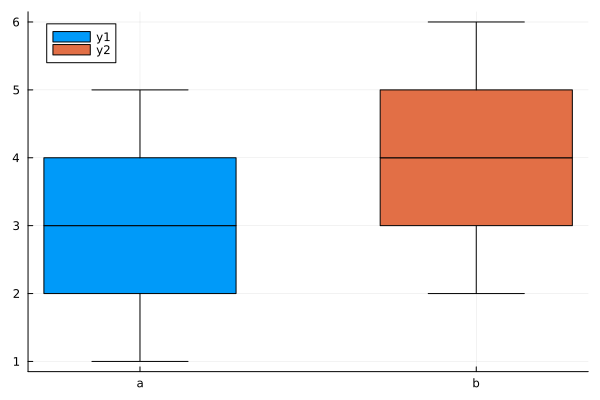

In [133]:
boxplot(["ACCESS-CM2"], [1,3,5])
boxplot!(["b"], [2,4,6])

In [107]:
npv_245_array

20-element Vector{Any}:
 [0.25906548471176155]
 [0.2353562684647587]
 [0.24969485851924106]
 [0.22917685933973198]
 [0.2317408775286482]
 [0.2451019479182342]
 [0.25004392459179675]
 [0.24719787611586916]
 [0.24190689544046712]
 [0.26712925903102175]
 [0.2169416536499578]
 [0.21540865095657155]
 [0.24105930681544407]
 [0.2527914380122492]
 [0.23389955954574132]
 [0.2242058612906705]
 [0.26824763937826424]
 [0.23336061238078226]
 [0.23477301633056874]
 [0.2745081665946213]

In [111]:
convert(Vector{Float64}, npv_245_array)

LoadError: MethodError: [0mCannot `convert` an object of type [92mVector{Float64}[39m[0m to an object of type [91mFloat64[39m
[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::Gray24[39m) where T<:Real at C:\Users\krfek\.julia\packages\ColorTypes\1dGw6\src\conversions.jl:114
[0m  convert(::Type{T}, [91m::Gray[39m) where T<:Real at C:\Users\krfek\.julia\packages\ColorTypes\1dGw6\src\conversions.jl:113
[0m  convert(::Type{T}, [91m::Base.TwicePrecision[39m) where T<:Number at twiceprecision.jl:273
[0m  ...

In [104]:
mymodels
NPV_245[:,1][9]

1-element Vector{Float64}:
 0.24190689544046712